# **04. Correlaciones y regresión lineal simple.**

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
from sklearn.linear_model import LinearRegression

In [22]:
df= pd.read_csv('/content/drive/MyDrive/BEDU/analisis_datos_python_2021/COVID-19 Survey Student Responses-clean.csv')
df.head(3)

,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling


## Identificamos las variables numéricas

La columna `Time spent on TV` tenía un único valor no numérico en la columna 18, una letra 'n'.

In [41]:
df_num = df.select_dtypes('number')
df_num.iloc[18]

Age of Subject                21.0
Time spent on Online Class     0.0
Time spent on self study       4.0
Time spent on fitness          0.0
Time spent on sleep            7.0
Time spent on social media     7.0
Time spent on TV               NaN
Number of meals per day        2.0
Name: 18, dtype: float64

In [42]:
df.shape

(1182, 18)

In [43]:
#df['Time spent on TV'] = df['Time spent on TV'].fillna(0)
df_num = df_num.dropna()
df_num.shape

(1169, 8)

In [44]:
df_num.corr()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day
Age of Subject,1.000000,-0.173336,0.009662,-0.053203,-0.117370,0.072160,-0.044976,-0.036677
Time spent on Online Class,-0.173336,1.000000,0.121002,-0.029979,-0.178298,-0.116901,-0.018378,0.001697
Time spent on self study,0.009662,0.121002,1.000000,0.032494,-0.222577,-0.161835,-0.134599,0.065848
Time spent on fitness,-0.053203,-0.029979,0.032494,1.000000,-0.038472,-0.069237,0.014589,0.128282
Time spent on sleep,-0.117370,-0.178298,-0.222577,-0.038472,1.000000,0.087794,0.085726,0.048393
Time spent on social media,0.072160,-0.116901,-0.161835,-0.069237,0.087794,1.000000,0.145371,0.031962
Time spent on TV,-0.044976,-0.018378,-0.134599,0.014589,0.085726,0.145371,1.000000,-0.010044
Number of meals per day,-0.036677,0.001697,0.065848,0.128282,0.048393,0.031962,-0.010044,1.000000


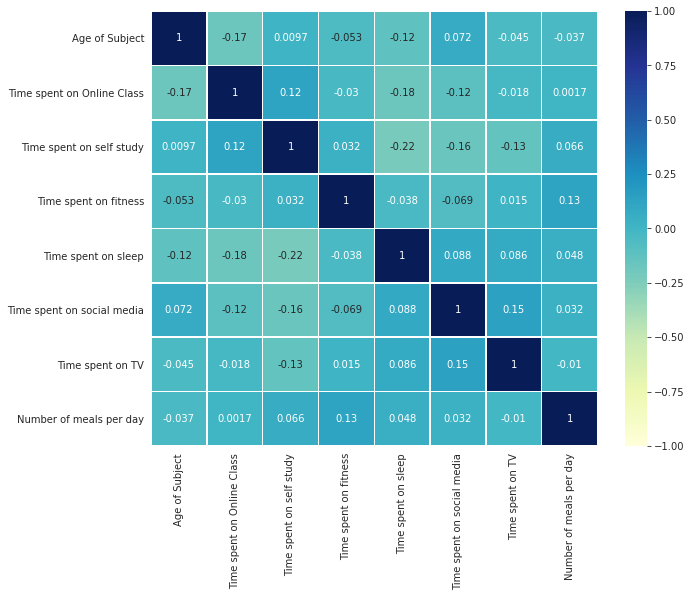

In [45]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_num.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

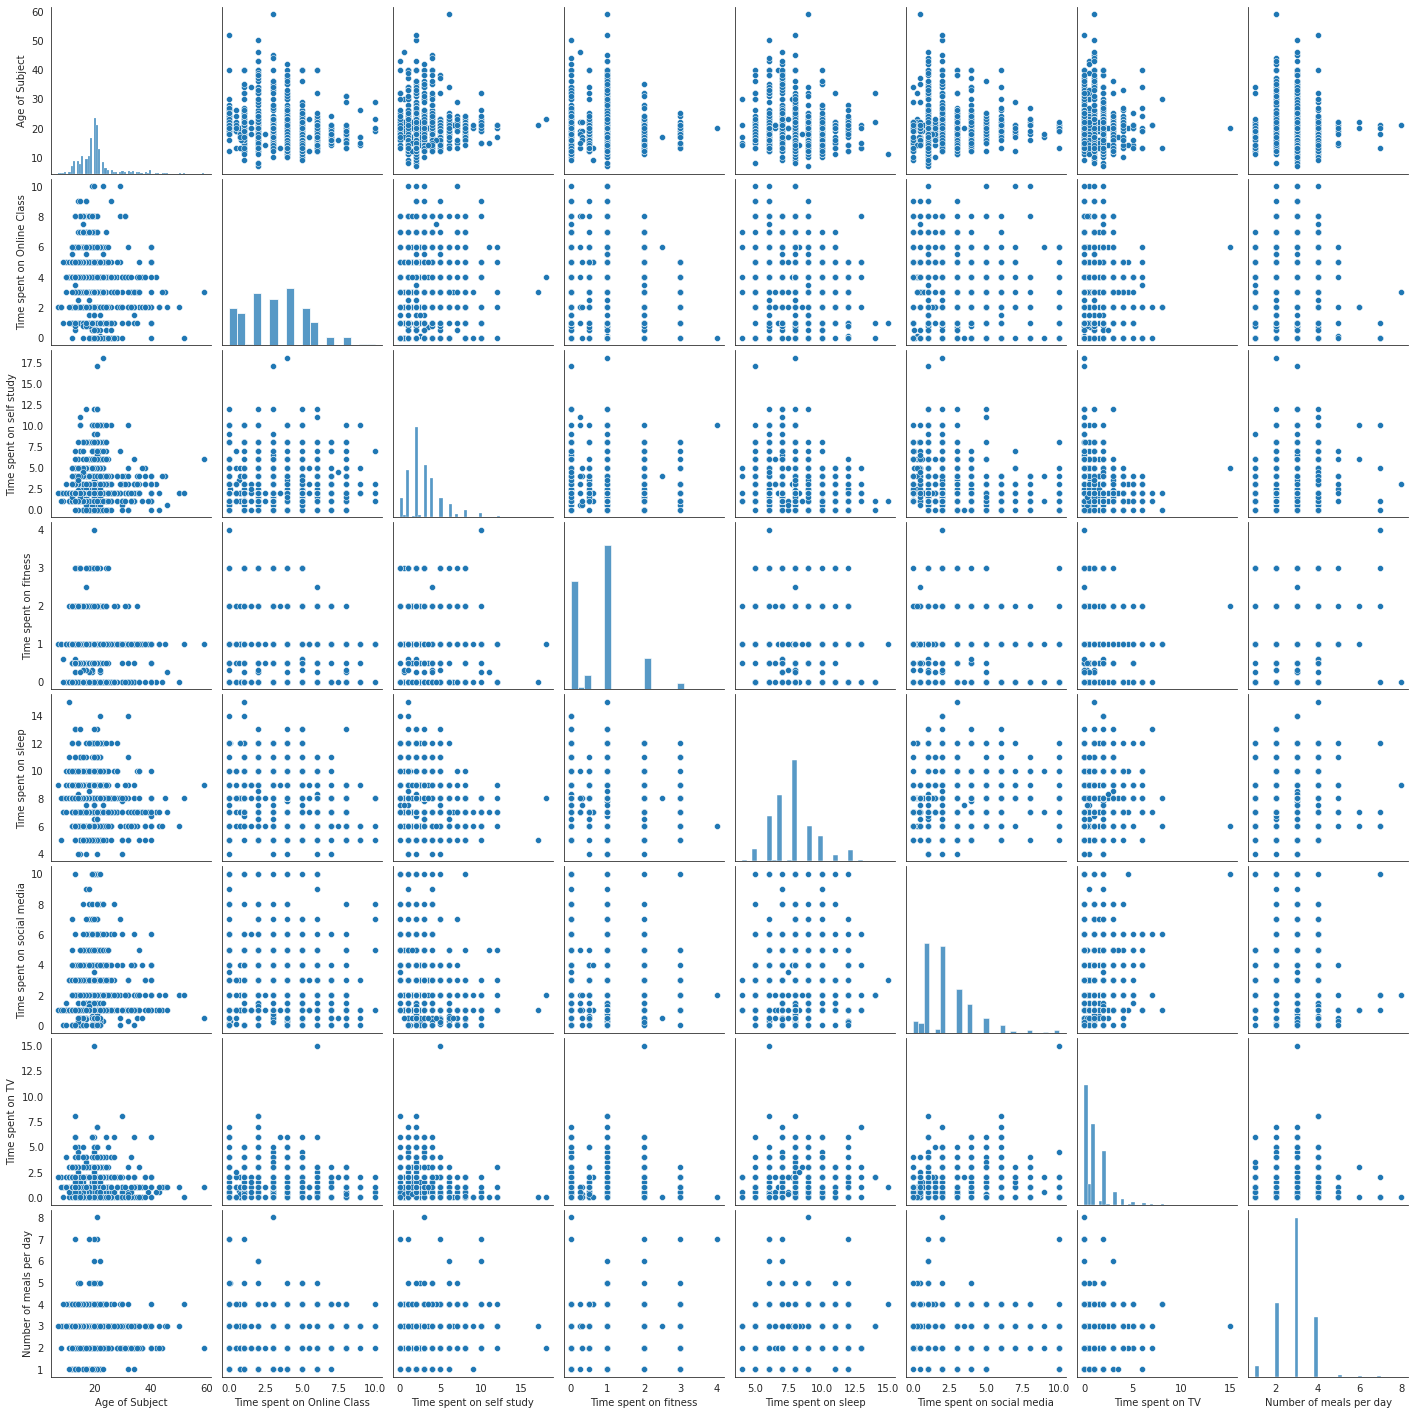

In [46]:
sns.pairplot(df_num);

In [47]:
def regresion(df_x, df_y):
  lr = LinearRegression()
  lr.fit(df_x.to_frame(), df_y)
  y_predict = lr.predict(df_x.to_frame())
  sns.scatterplot(x=df_x, y=df_y, s=40);
  sns.lineplot(x=df_x, y=y_predict, color='g');
  print('Coeficiente de Pearson: ',round(lr.score(df_x.to_frame(), df_y),4))

Coeficiente de Pearson:  0.0495


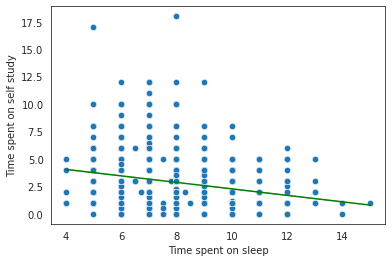

In [48]:
regresion(df_num['Time spent on sleep'],df_num['Time spent on self study'])

Coeficiente de Pearson:  0.0181


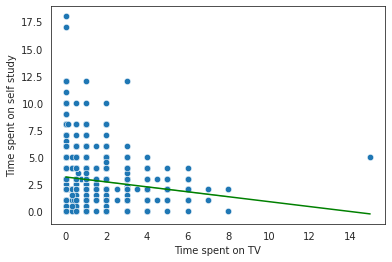

In [49]:
regresion(df_num['Time spent on TV'],df_num['Time spent on self study'])

In [50]:
df_num = df_num[df_num['Time spent on TV'] < 12]

Coeficiente de Pearson:  0.0231


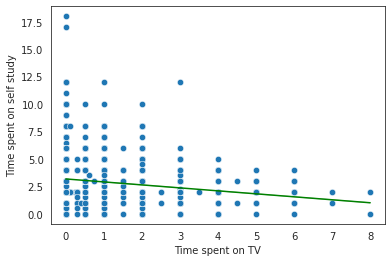

In [51]:
regresion(df_num['Time spent on TV'],df_num['Time spent on self study'])